# Trends in Housing Prices 
### By: Julia Kirk
How do California housing prices compare to pricing in other states, and how do major cities differ within California?

### Sources
1. https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx "States (Developmental Index; Not Seasonally Adjusted)" this dataset was converted into a csv for the project
2. https://www.kaggle.com/datasets/yellowj4acket/real-estate-california/data
3. https://rapidapi.com/mashvisor-team/api/mashvisor/details


In [1]:
# import libraries
import pandas as pd
import seaborn as sb
import numpy as np 
import matplotlib.pyplot as plt
import json
import requests

In [2]:
#set seborne theme to paste;
sb.set_theme(style="whitegrid", palette="pastel")

## Data Source One:
### FHFA Housing Price Index
The FHFA HPI is a broad measure of the movement of single-family house prices. The FHFA HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

The FHFA HPI serves as a timely, accurate indicator of house price trends at various geographic levels. Because of the breadth of the sample, it provides more information than is available in other house price indexes. It also provides housing economists with an improved analytical tool that is useful for estimating changes in the rates of mortgage defaults, prepayments and housing affordability in specific geographic areas.

<h3>Data Dictionary:</h3>
<li>State: State or district name</li>
<li>Abbreviation: State abbreviaiton</li>
<li>FIPS: code for identifying geographic area</li>
<li>Year: Year data was recorded</li>
<li>Annual Change %: Percent change per year</li>
<li>HPI: The FHFA House Price Index® (FHFA HPI®) is a broad economic measure of the movement of single-family house prices in the United States. Although FHFA constructs several indexes for different market geographies and periods, it often references the entire suite of indexes as the “FHFA HPI.” All the indexes are created in the same technical manner. The flagship FHFA HPI is the purchase-only index which uses seasonally adjusted, purchase-only (PO) data; and is the data most referenced in press releases, news stories, and social media. FHFA created additional indexes to address questions about house price changes in other market segments such as the all-transections (AT) index that includes refinances data, or the expanded PO index that includes purchase data on entire single-family property market.</li>
<li>HPI with 1990 base: HPI adjusted to start at the first week of January 1990</li>
<li>HPI with 2000 base: HPI adjusted to start at the first week of January 2000</li>

In [3]:
#import housing price index data 
hpiDF = pd.read_csv("HPI.csv")
hpiDF

,State,Abbreviation,FIPS,Year,Annual Change,HPI,HPI with 1990 base,HPI with 2000 base
0,Alabama,AL,1,1975,.,100.00,49.75,36.11
1,Alabama,AL,1,1976,6.68,106.68,53.07,38.52
2,Alabama,AL,1,1977,10.04,117.39,58.40,42.39
3,Alabama,AL,1,1978,8.32,127.17,63.26,45.92
4,Alabama,AL,1,1979,10.70,140.77,70.03,50.83
...,...,...,...,...,...,...,...,...
2443,Wyoming,WY,56,2018,3.46,584.47,326.21,193.98
2444,Wyoming,WY,56,2019,4.39,610.15,340.54,202.50
2445,Wyoming,WY,56,2020,3.91,634.00,353.85,210.41
2446,Wyoming,WY,56,2021,9.22,692.44,386.47,229.81


I created a pivot table to compare years, HPI value and state. This helped me to better visulize how the HPI for each state started off the same but over time started to spread out more and become more varried


In [4]:
#Pivot table to compare states hpi from year to year and to states to other states
hpiDF.pivot_table(index="State",values ='HPI', columns='Year')

Year,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,106.68,117.39,127.17,140.77,147.52,153.99,153.80,161.56,170.13,...,332.68,337.31,344.96,354.16,365.24,381.48,398.62,414.49,457.40,528.53
Alaska,100.0,109.12,118.46,130.35,144.84,136.57,165.55,206.85,219.06,234.39,...,425.95,436.57,450.47,458.83,464.88,471.38,481.54,492.85,525.71,588.78
Arizona,100.0,104.09,112.43,129.56,158.30,176.74,190.96,181.91,200.55,209.34,...,437.82,481.97,508.89,544.91,585.21,630.40,674.06,719.59,851.27,1024.78
Arkansas,100.0,109.87,122.30,132.82,152.68,163.68,171.17,171.20,185.68,190.82,...,352.89,358.16,366.35,375.29,388.52,404.70,418.04,429.45,475.68,550.95
California,100.0,114.18,138.80,163.12,189.09,219.25,241.44,234.01,247.53,254.83,...,818.75,931.64,985.67,1062.85,1131.14,1203.68,1244.06,1275.05,1435.39,1660.19
Colorado,100.0,108.72,123.73,145.51,170.25,186.10,199.16,222.71,227.11,227.51,...,568.67,620.49,679.16,749.32,814.45,881.04,922.98,949.56,1071.01,1244.62
Connecticut,100.0,106.23,111.76,131.37,156.82,167.24,180.75,187.54,201.53,227.21,...,542.78,542.73,550.19,550.83,557.30,566.30,578.71,596.22,666.34,756.36
Delaware,100.0,104.46,101.33,108.64,115.35,133.65,145.01,148.51,155.46,169.62,...,466.23,477.39,488.52,498.08,508.61,528.62,546.08,564.34,624.62,709.86
District of Columbia,100.0,110.41,124.34,143.73,169.59,181.19,178.32,168.20,183.33,195.86,...,1032.80,1125.07,1191.11,1270.76,1334.41,1398.28,1451.70,1482.84,1584.75,1711.91


https://seaborn.pydata.org/generated/seaborn.lineplot.html

<Axes: xlabel='Year', ylabel='HPI'>

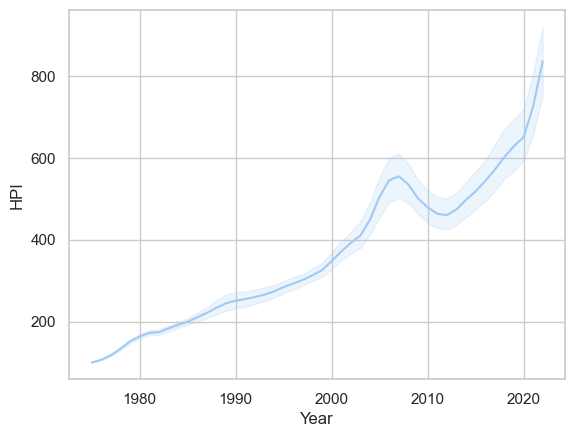

In [5]:
#visualization to show the mean increase of HPI per year using the estimator function
sb.lineplot(data = hpiDF, y='HPI', x ="Year", legend= False, estimator = np.mean)

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='Year', ylabel='HPI'>

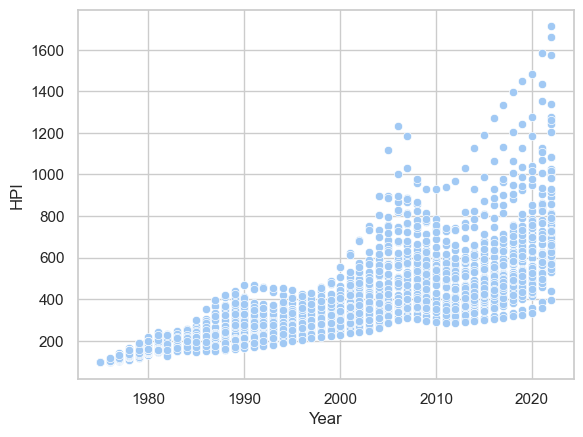

In [6]:
#scatterplot showing hpi for each state per year to show outliers in data
sb.scatterplot(data = hpiDF, y='HPI', x ="Year")

After looking at the overall trends in HPI I wanted to look at the maximum and minimum annual increase in HPI per state and see if there are any patterns there and compare the states with the largest increase in a year to the maximum HPI. From this comparison I noticed that there wasnt a whole lot of difference between max and min annual increses for each state and the ones with the highest percent increase were not always the same as the states with the highest HPI

In [7]:
# after looking at the overall change in 
hpiDF.groupby("State").agg({"HPI":max,"Annual Change":[max, min]}).sort_values(by =("HPI","max"), ascending=False)
#by looking at this data I realized there wasnt much connection between high annual change and high HPI

HPI Annual Change       
                          max           max    min
State                                             
District of Columbia  1711.91          9.50  -0.66
California            1660.19          9.55  -0.08
Washington            1576.36          9.46  -1.81
Hawaii                1340.87          9.82  -0.23
Massachusetts         1276.29          9.78  -0.88
Oregon                1263.70          9.55  -0.95
Colorado              1244.62          9.93  -1.06
Utah                  1204.63          9.75  -0.54
Montana               1083.41          9.41  -0.52
Rhode Island          1081.83          9.23  -0.16
Arizona               1024.78          8.05  -0.36
Nevada                1016.97          9.74  -1.01
Idaho                  997.78          9.42  -0.50
New Jersey             983.00          9.35  -0.15
New Hampshire          980.75          7.72  -0.34
New York               929.03          9.80  -0.13
Maine                  916.36          9.47  -0.86
Florida                890.35          9.58  -0.19
Maryland               856.78          9.68  -1.66
Vermont                813.97          9.16  -0.04
Virginia               811.32          9.95  -0.49
Wyoming                792.45          9.22  -0.28
Minnesota              780.23          9.50  -0.77
Connecticut            756.36          9.25  -0.01
Tennessee              732.73          9.19  -0.38
Texas                  729.04          8.13  -0.38
South Dakota           724.02          6.78  -0.02
North Carolina         716.26          8.50  -2.49
New Mexico             713.56          9.85  -0.22
Delaware               709.86          9.77  -0.30
Pennsylvania           694.94          9.73  -0.74
South Carolina         668.03          9.98  -1.95
Wisconsin              660.90          9.76  -0.19
Nebraska               647.63          8.06  -0.46
Michigan               644.08          9.60  -0.63
Georgia                637.58          9.99  -2.01
Kentucky               635.44          9.98  -0.05
North Dakota           625.66          9.94  -0.61
Indiana                605.97          6.56  -0.54
Missouri               605.40          9.38  -1.15
Alaska                 588.78          9.97  -0.26
Louisiana              574.10          9.85  -1.20
Illinois               569.89          9.90  -2.75
Oklahoma               569.87          9.77  -0.13
Kansas                 552.88          7.83  -0.21
Iowa                   551.23          9.78  -0.49
Arkansas               550.95          9.87  -0.10
Ohio                   544.16          7.97  -1.16
Alabama                528.53          8.32  -0.12
Mississippi            439.34          8.71  -0.22
West Virginia          395.17          9.24  -0.56

In [8]:
hpiDF[hpiDF['State']== 'California']

,State,Abbreviation,FIPS,Year,Annual Change,HPI,HPI with 1990 base,HPI with 2000 base
192,California,CA,6,1975,.,100.00,21.38,18.02
193,California,CA,6,1976,14.18,114.18,24.41,20.58
194,California,CA,6,1977,21.56,138.80,29.68,25.01
195,California,CA,6,1978,17.52,163.12,34.88,29.40
196,California,CA,6,1979,15.92,189.09,40.43,34.08
197,California,CA,6,1980,15.95,219.25,46.88,39.51
198,California,CA,6,1981,10.12,241.44,51.62,43.51
199,California,CA,6,1982,-3.08,234.01,50.03,42.17
200,California,CA,6,1983,5.78,247.53,52.93,44.61
201,California,CA,6,1984,2.95,254.83,54.49,45.92


For this project I chose to focus mainly on housing data in California. This next graph is the HPI in California specificly. By looking at the data visually I can see that california's housing market was hit a lot harder than the rest of the country by the recession but also increased significantly faster in the years leading up to it. The 2022 data shows that the HPI for California 1660 is almost double the National Average of 835.5. 

<Axes: xlabel='Year', ylabel='HPI'>

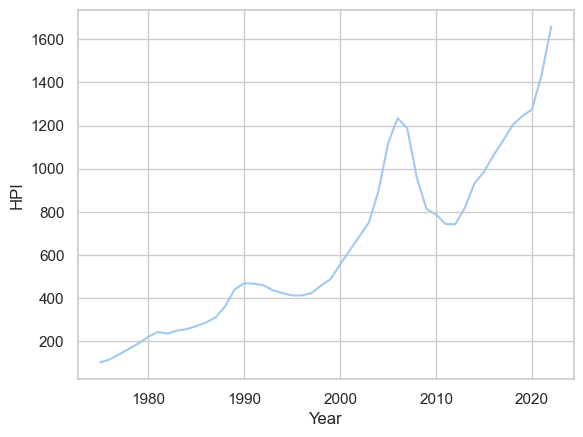

In [9]:
#lineplot to show California's HPI trends over time
# filter data for just california and make a line plot to show hpi by year
sb.lineplot(data= hpiDF[hpiDF["State"]== "California"], y='HPI', x ="Year")

## Data Source 2: California Real Estate
https://www.kaggle.com/datasets/yellowj4acket/real-estate-california/code
<br>
This is a dataset containing California real estate data from January - June of 2021

https://pandas.pydata.org/docs/user_guide/options.html

In [10]:
#import csv file as a pandas df
californiaDF = pd.read_csv("RealEstate_California.csv")
#imported with empty first row so used drop to remove
californiaDF.drop(columns=californiaDF.columns[0], axis=1, inplace=True)
#set formatting of floats so not in scientific notation 
pd.options.display.float_format = '{:.0f}'.format
californiaDF

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,1/13/21,0,0,Listed for sale,1610500000000,...,0,0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,7/12/21,0,0,Listed for sale,1626050000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,7/8/21,0,0,Listed for sale,1625700000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,7/7/21,0,0,Listed for sale,1625620000000,...,1,1,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,7/7/21,0,0,Listed for sale,1625620000000,...,0,0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,90036-20610069,9,130313,12447,USA,6/19/21,0,0,Listing removed,1620260000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,90036-20610391,9,130314,12447,USA,6/17/21,0,0,Listing removed,1624320000000,...,1,2,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,95062-16111852,9,130368,13715,USA,6/21/21,0,0,Listed for sale,1624230000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,95062-16111367,9,130369,13715,USA,6/11/21,0,0,Listed for sale,1623370000000,...,1,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [11]:
#create a crosstab with each county and lot type 
pd.crosstab(californiaDF['county'],californiaDF['homeType'], margins=True)

homeType,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE,All
county,,,,,,,
Alameda County,0,200,62,145,687,57,1151
Alpine County,0,0,8,0,8,0,16
Amador County,0,0,100,4,95,0,199
Butte County,0,8,106,6,187,0,307
Calaveras County,0,1,151,6,126,2,286
Colusa County,0,0,15,3,6,0,24
Contra Costa County,0,118,72,30,638,59,917
Del Norte County,0,0,34,1,39,0,74
El Dorado County,0,2,147,4,215,0,368


https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

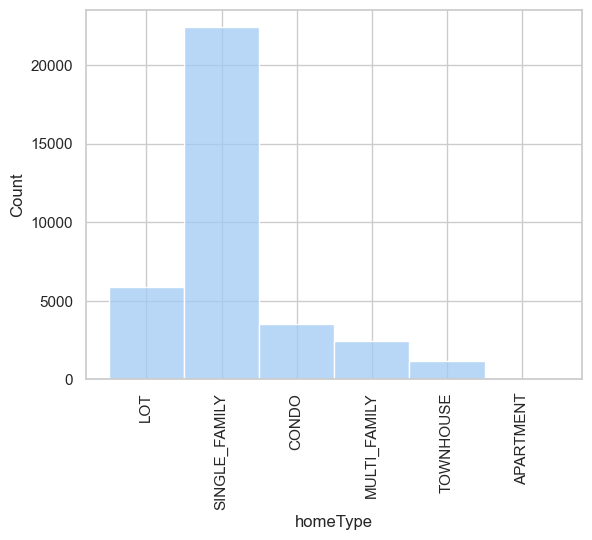

In [12]:
#create histogram of home types
sb.histplot(data=californiaDF, x= 'homeType')
#change x ticks for readabilty 
plt.xticks(rotation=90)
plt.show()

https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn
read to change lable angle

In [13]:
#mean and median home price per county using agg functions, sorted high to low median price
californiaDF.groupby("county").agg({"price":[np.median, np.mean]}).sort_values(("price","median"),ascending=False)

price        
                        median    mean
county                                
San Francisco County   1588000 2338859
San Mateo County       1449000 2521376
Marin County           1375000 2298829
Santa Clara County     1349999 1940575
Santa Barbara County   1250000 3367401
Napa County            1175000 2631021
Santa Cruz County       998888 1288731
Alameda County          949000 1130959
Monterey County         925000 2029098
Orange County           889000 1458495
Los Angeles County      869900 1509531
San Benito County       799999 2266805
Sonoma County           799000 1321809
San Diego County        792400 1199560
Ventura County          789000 1228447
Contra Costa County     785000 1137702
San Luis Obispo County  763450 1093550
Placer County           669000 1093884
Solano County           619900  735582
Yolo County             599000  937516
Nevada County           599000  750406
Mendocino County        570000 1037533
Sacramento County       525000  699264
Colusa County           510250 1165710
San Joaquin County      499000  700424
Riverside County        495000  658839
Mono County             487000  704538
Stanislaus County       462500  903830
El Dorado County        452000  681735
Sutter County           449900  653407
Alpine County           444000  500156
Amador County           399000  484625
Merced County           395000  774109
San Bernardino County   385000  443276
Tuolumne County         380000  448609
Humboldt County         375000  627974
Yuba County             374900  452174
Madera County           350500  541138
Butte County            350000  481081
Fresno County           330000  639475
Trinity County          324000  408154
Calaveras County        321950  603286
Shasta County           305000  471041
Tehama County           300000  471803
Tulare County           300000  770168
Glenn County            300000  712574
Kings County            299950  610400
Del Norte County        295000  494851
Sierra County           289000  403772
Imperial County         260000  560611
Kern County             240000  377324
Mariposa County         237000  557833
Siskiyou County         229000  386855
Lake County             212000  609139
Inyo County             210000  269645
Plumas County           199000  386949
Lassen County           159600  306550
Modoc County            129000  220826

In [14]:
#crosstab for different real estate events by county, margins on to show total tabs
pd.crosstab(californiaDF['county'],californiaDF['event'],margins=True)

event,Listed for rent,Listed for sale,Listing removed,Pending sale,Price change,Sold,All
county,,,,,,,
Alameda County,0,966,10,0,155,19,1150
Alpine County,0,12,0,0,4,0,16
Amador County,0,136,6,0,57,0,199
Butte County,0,181,65,0,51,8,305
Calaveras County,0,215,7,0,63,1,286
Colusa County,0,18,2,0,4,0,24
Contra Costa County,0,770,14,1,123,9,917
Del Norte County,0,58,2,0,14,0,74
El Dorado County,0,268,7,0,89,4,368


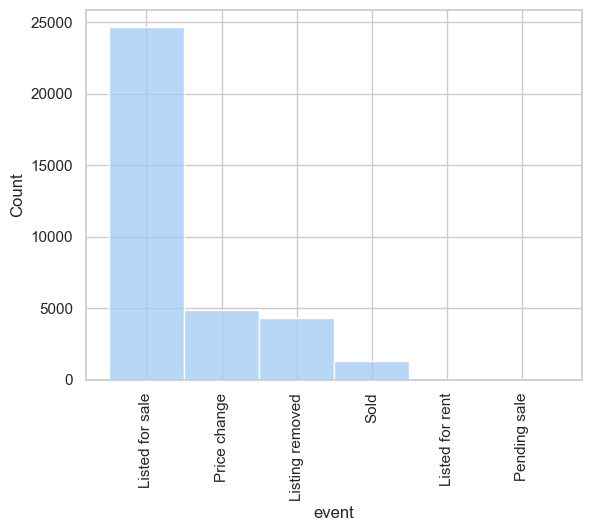

In [15]:
#histogram visuilzation showing event totals
sb.histplot(data=californiaDF, x= 'event')
#rotate xticks
plt.xticks(rotation=90)
plt.show()

In [16]:
# filter to create new DF of just single family homes
singleFamilyDF = californiaDF[californiaDF['homeType']=='SINGLE_FAMILY']
singleFamilyDF

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,94564-18496265,9,189,36958,USA,7/12/21,0,0,Listed for sale,1626050000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,7/8/21,0,0,Listed for sale,1625700000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,7/7/21,0,0,Listed for sale,1625620000000,...,1,1,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,94564-18484390,9,193,36958,USA,7/6/21,0,0,Listed for sale,1625530000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,94564-50919342,9,194,36958,USA,7/5/21,0,0,Listed for sale,1625440000000,...,1,2,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,90036-20610069,9,130313,12447,USA,6/19/21,0,0,Listing removed,1620260000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,90036-20610391,9,130314,12447,USA,6/17/21,0,0,Listing removed,1624320000000,...,1,2,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,95062-16111852,9,130368,13715,USA,6/21/21,0,0,Listed for sale,1624230000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,95062-16111367,9,130369,13715,USA,6/11/21,0,0,Listed for sale,1623370000000,...,1,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [17]:
# use agg functions to compare mean and median price per square foot for each county 
singleFamilyDF.groupby("county").agg({"pricePerSquareFoot":[np.median,np.mean]}).sort_values(("pricePerSquareFoot", "median"),ascending=False)

pricePerSquareFoot      
                                   median  mean
county                                         
San Mateo County                     1042  1203
Santa Clara County                    910   996
San Francisco County                  865   895
Marin County                          826   917
Napa County                           724   986
Santa Cruz County                     699   827
Alameda County                        635   647
Santa Barbara County                  596   763
Monterey County                       558   800
Los Angeles County                    545   621
Orange County                         522   606
Contra Costa County                   516   529
Sonoma County                         500  4146
San Luis Obispo County                500   585
San Diego County                      480   564
Ventura County                        446  2168
Mono County                           422   468
Mendocino County                      413   573
San Benito County                     403   483
Yolo County                           352   411
El Dorado County                      343   384
Solano County                         335   372
Placer County                         333   431
Nevada County                         326   379
Sacramento County                     323   362
Humboldt County                       307   410
Alpine County                         305   330
Mariposa County                       300   433
San Bernardino County                 293   302
San Joaquin County                    293   315
Calaveras County                      276   312
Stanislaus County                     271   298
Sierra County                         270   278
Riverside County                      269   288
Tuolumne County                       264   279
Lake County                           262   456
Butte County                          261   258
Amador County                         259   317
Glenn County                          255   321
Yuba County                           250   316
Del Norte County                      245   280
Plumas County                         244   345
Sutter County                         244   263
Inyo County                           236   241
Siskiyou County                       236   312
Madera County                         233   276
Trinity County                        233   356
Merced County                         230   312
Tehama County                         229   388
Shasta County                         225   309
Colusa County                         213   226
Fresno County                         211   226
Tulare County                         200   322
Imperial County                       187   186
Kern County                           186   179
Lassen County                         177   207
Kings County                          175   173
Modoc County                          142 20951

In [18]:
#use group by and agg functions to compare median and mean living area by county 
singleFamilyDF.groupby("county").agg({"livingArea":[np.median,np.mean]}).sort_values(("livingArea", "median"),ascending=False)

livingArea      
                           median  mean
county                                 
Mono County                  2338  2297
Placer County                2262  2480
Marin County                 2174  2553
Sierra County                2172  2751
Monterey County              2162  2763
Alpine County                2133  2221
Orange County                2100  2507
Nevada County                2074  2220
Solano County                2065  2211
Sutter County                2037  2200
Riverside County             2032  2235
Calaveras County             2030  2099
Ventura County               2017  2474
San Benito County            2016  2092
Amador County                2000  2179
El Dorado County             1988  2198
Napa County                  1988  7217
Santa Barbara County         1938 31738
San Diego County             1932  2323
Plumas County                1920  2122
Contra Costa County          1918  2259
Sonoma County                1904  2183
Santa Cruz County            1900  2109
San Mateo County             1890  2488
Trinity County               1856  1962
Santa Clara County           1850  2285
Madera County                1837  1988
San Luis Obispo County       1828  2052
San Joaquin County           1827  1979
Shasta County                1816  2002
Mariposa County              1800  2253
Los Angeles County           1800  2253
San Francisco County         1794  2100
Siskiyou County              1781  2029
Stanislaus County            1772  1981
Tuolumne County              1768  1958
Lassen County                1742  1802
Yuba County                  1714  1916
Colusa County                1703  1825
Tulare County                1702  1801
Del Norte County             1699  1867
Merced County                1695  1785
Alameda County               1694  1980
Imperial County              1690  1857
Butte County                 1679  1880
Tehama County                1668  1875
Sacramento County            1661  1848
San Bernardino County        1651  2186
Fresno County                1641  1809
Yolo County                  1638  1894
Kings County                 1620  1708
Modoc County                 1536  1661
Glenn County                 1500  1755
Lake County                  1500  1773
Mendocino County             1500  1766
Humboldt County              1500  1676
Kern County                  1493  1537
Inyo County                  1488  1529

https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/

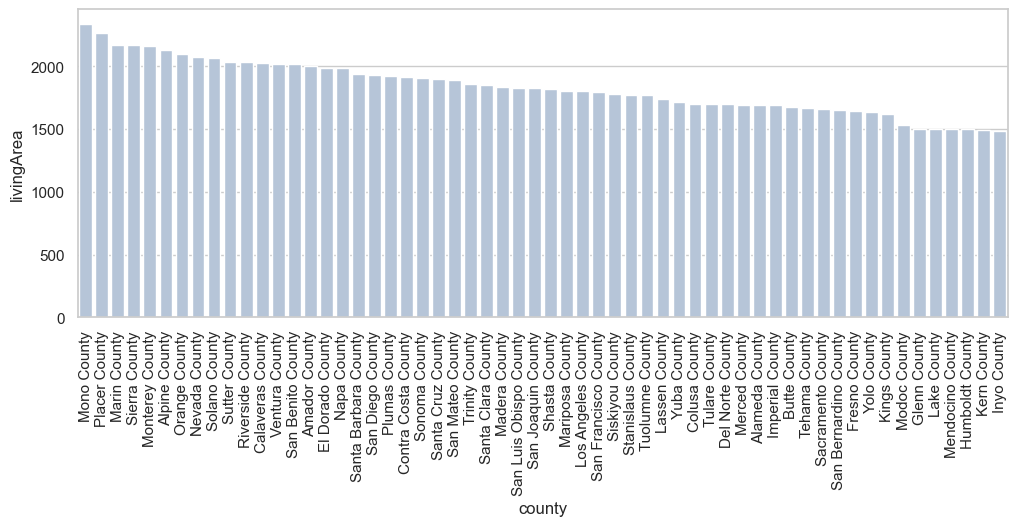

In [19]:
#set median living area
medianLivingArea = singleFamilyDF.groupby("county").agg({"livingArea": np.median}).sort_values("livingArea", ascending=False).reset_index()
#change plot size
plt.figure(figsize=(12, 4))
# create bar plot 
sb.barplot(data=medianLivingArea, x="county", y="livingArea",color="lightsteelblue")
#rotate xticks
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

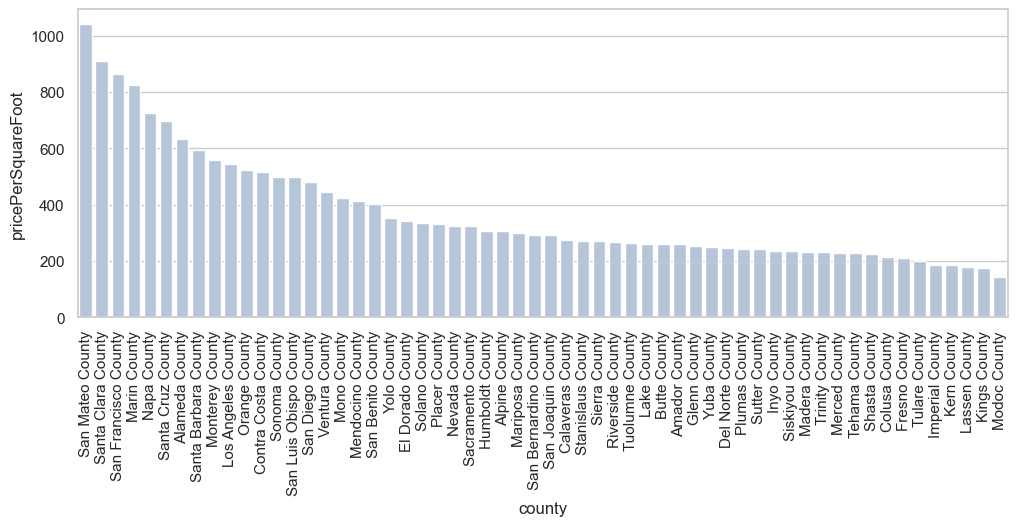

In [20]:
#create median sq ft variable
medianSQFTValue = singleFamilyDF.groupby("county").agg({"pricePerSquareFoot": np.median}).sort_values("pricePerSquareFoot", ascending=False).reset_index()
#change plot size
plt.figure(figsize=(12, 4))
#create bar plot
sb.barplot(data=medianSQFTValue, x="county", y="pricePerSquareFoot",color="lightsteelblue")
#rotate xticks and make tight layout for visuals
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

In [21]:
#create a dataframe that contains all house types except for empty lots
nonLotDF = californiaDF[californiaDF['homeType']!='LOT']
nonLotDF

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,94564-18496265,9,189,36958,USA,7/12/21,0,0,Listed for sale,1626050000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,7/8/21,0,0,Listed for sale,1625700000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,7/7/21,0,0,Listed for sale,1625620000000,...,1,1,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,94564-18484390,9,193,36958,USA,7/6/21,0,0,Listed for sale,1625530000000,...,1,2,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,94564-50919342,9,194,36958,USA,7/5/21,0,0,Listed for sale,1625440000000,...,1,2,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,90036-20610069,9,130313,12447,USA,6/19/21,0,0,Listing removed,1620260000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,90036-20610391,9,130314,12447,USA,6/17/21,0,0,Listing removed,1624320000000,...,1,2,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,95062-16111852,9,130368,13715,USA,6/21/21,0,0,Listed for sale,1624230000000,...,0,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,95062-16111367,9,130369,13715,USA,6/11/21,0,0,Listed for sale,1623370000000,...,1,0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [22]:
#find median and mean year built for listings in each county
nonLotDF.groupby("county").agg({"yearBuilt": [np.median, np.mean, min, max]}).sort_values(("yearBuilt", "median"), ascending=False)

yearBuilt                 
                          median mean   min   max
county                                           
San Benito County           2000 1986  1877  2021
Yuba County                 1992 1964     0  2021
Alpine County               1990 1990  1968  2006
Riverside County            1990 1984     0  2022
Placer County               1989 1909     0  2022
Amador County               1988 1961     0  2021
Imperial County             1987 1983  1920  2021
Calaveras County            1987 1965     0  2021
Solano County               1987 1982  1876  2021
San Luis Obispo County      1986 1980  1890  2022
Madera County               1985 1953     0  2020
Nevada County               1984 1887     0  2022
Mariposa County             1984 1978  1899  2009
El Dorado County            1983 1937     0  2021
Shasta County               1983 1861     0  2021
Merced County               1982 1967     0  2021
Trinity County              1981 1891     0  2021
San Diego County            1980 1977     0  2022
San Joaquin County          1980 1966     0  2021
Butte County                1980 1976  1909  2021
Plumas County               1980 1958     0  2021
Lake County                 1980 1961     0  2021
Tuolumne County             1979 1962     0  2021
Mono County                 1979 1823     0  2021
Lassen County               1978 1974  1930  2011
Sonoma County               1978 1879     0  2021
San Bernardino County       1978 1964     0  2022
Tehama County               1978 1975  1906  2021
Kern County                 1978 1948     0  2021
Stanislaus County           1978 1969     0  2021
Sutter County               1978 1977  1911  2021
Tulare County               1977 1844     0  2021
Ventura County              1977 1975     0  2022
Sacramento County           1976 1957     0  2021
Contra Costa County         1975 1967     0  2021
Monterey County             1975 1974  1891  2021
Santa Barbara County        1974 1933     0  2021
Santa Cruz County           1974 1961     0  2021
Orange County               1974 1975     0  2022
Santa Clara County          1974 1973     0  2021
Yolo County                 1973 1827     0  2021
Napa County                 1972 1861     0  2020
Del Norte County            1972 1828     0  2021
Fresno County               1971 1897     0  2021
Inyo County                 1969 1967  1919  2004
Sierra County               1966 1820     0  2013
San Mateo County            1965 1953     0  2021
Colusa County               1964 1752     0  2009
Marin County                1964 1906     0  2021
Alameda County              1962 1950     0  2022
Kings County                1962 1923     0  2021
Los Angeles County          1958 1956     0  2021
Siskiyou County             1955 1418     0  2016
Humboldt County             1954 1938     0  2021
Glenn County                1952 1957  1906  2021
Mendocino County            1950 1293     0  2020
Modoc County                1950 2501  1876  9999
San Francisco County        1924 1808     0  9999

<Axes: xlabel='bedrooms', ylabel='Count'>

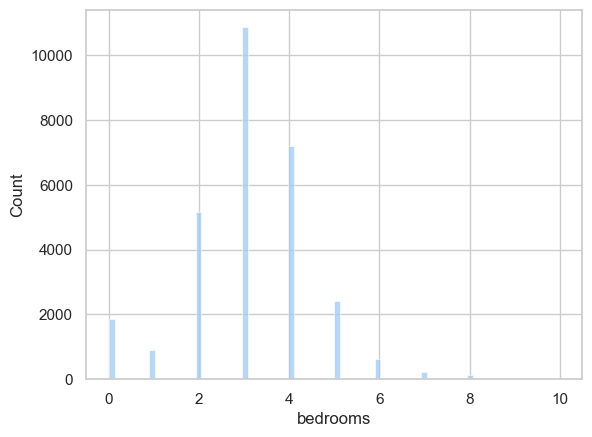

In [23]:
# Graph bedrooms, change bin range to account for outliers in data making it hard to read visulization
sb.histplot(data=nonLotDF, x='bedrooms',binrange=(0, 10))

<Axes: xlabel='bathrooms', ylabel='Count'>

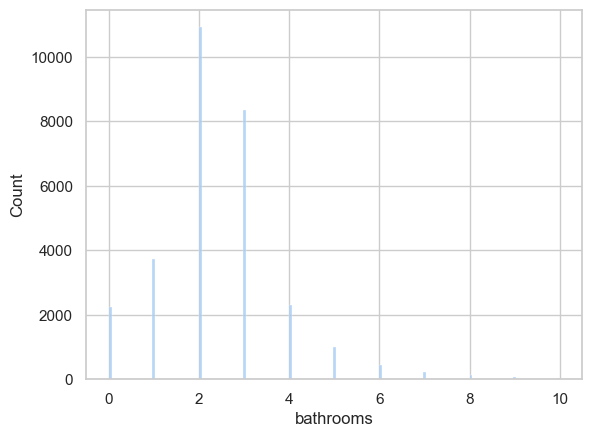

In [24]:
# Graph bathrooms, change bin range to account for outliers in data making it hard to read visulization
sb.histplot(data=nonLotDF, x='bathrooms', binrange=(0, 10))

<Axes: xlabel='garageSpaces', ylabel='Count'>

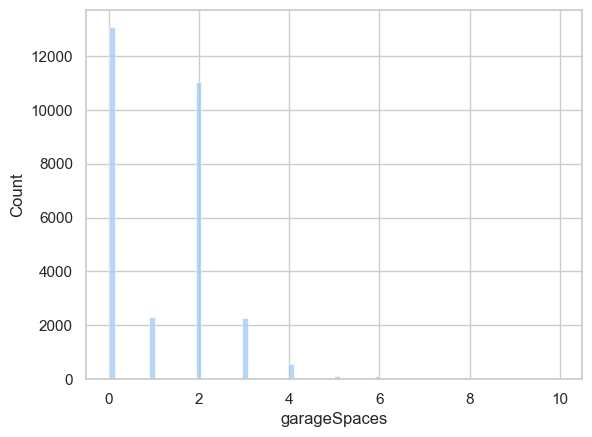

In [25]:
# Graph garage spaces, change bin range to account for outliers in data making it hard to read visulization
sb.histplot(data=nonLotDF, x='garageSpaces', binrange=(0, 10))

(0.0, 20000.0)

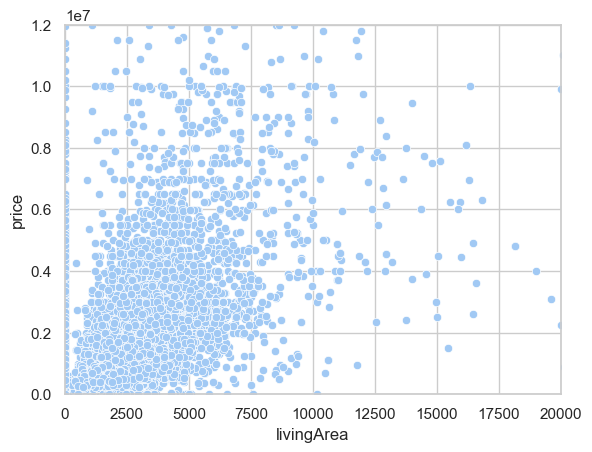

In [26]:
sb.scatterplot(data = nonLotDF, y='price', x ="livingArea")
plt.ylim(0, 12000000)
plt.xlim(0, 20000)

In [27]:
#find the sum of real estate by city 
nonLotDF.groupby("city").agg({"price":[sum, 'count']}).sort_values(("price",'sum'),ascending=False).head(30)

price      
                          sum count
city                               
Los Angeles        2989093225  1563
San Francisco      1713453419   734
San Diego          1043124431  1006
San Jose            839541721   657
Santa Barbara       642500700   150
Santa Monica        565622432   142
Newport Beach       504889027   115
Malibu              482174499    40
Sacramento          427759995   679
Palo Alto           423181548    76
Beverly Hills       401247797    74
Oakland             383597822   405
Long Beach          369342358   341
Irvine              348663806   197
Atherton            334572000    23
Pasadena            325992031   193
Los Gatos           322640762   111
Pacific Palisades   261272999    31
Los Altos           261039776    43
Rancho Santa Fe     240001900    35
Glendale            237010382   170
Berkeley            198974486   120
Corona Del Mar      196726000    29
Coronado            190459889    42
Fresno              180597951   414
La Jolla            178802699    65
Pebble Beach        172522000    20
Santa Ana           171446264   189
San Marino          167669548    39
Encino              166711948    61

In [28]:
nonLotDF.groupby("city").agg({"price":np.mean}).sort_values("price",ascending=False).head(30)

,price
city,
MALIBU,39500000
Five Points,37780000
Summerland,17048167
Atherton,14546609
Woodside,12289000
Ross,12149000
Malibu,12054362
Nicasio,11850000
Pebble beach,10998000


In [29]:
nonLotDF.groupby("city").agg({"price":max}).sort_values("price",ascending=False).head(30)

,price
city,
Santa Monica,90000000
Los Angeles,85000000
Malibu,75000000
Santa Barbara,74000000
Summerland,65000000
Newport Beach,59800000
Palo Alto,53888000
San Francisco,46000000
Newport Coast,45000000


### Source 3: 
https://rapidapi.com/mashvisor-team/api/mashvisor
#### Description: 
Mashvisor APIs allow you to conduct real estate market analysis of any US housing market for both long term rental properties (traditional rentals) and short term rental properties (Airbnb rentals). Furthermore, you get access to nationwide real estate data for traditional rental listings as well as Airbnb listings. The data includes but is not limited to price estimate of MLS listings and off market properties, traditional rental rates (rental income), recurring rental expenses, Airbnb nightly rates, Airbnb occupancy rate, Airbnb rental income traditional and Airbnb return on investment including cash flow, cash on cash return, and cap rate.


In [30]:
# make query to call api for Los Angeles data
url = "https://mashvisor-api.p.rapidapi.com/rental-rates"
querystring = {"state":"CA","source":"traditional","city":"Los Angeles"}
headers = {
	"X-RapidAPI-Key": "0b5b687050msh56934e541fa7726p1bd0f3jsncd59a232e677",
	"X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
}

laRentQuery = requests.get(url, headers=headers, params=querystring).json()

In [31]:
# call detailed content 
laRentQuery['content']['detailed']

[{'state': 'CA',
  'city': 'Los Angeles',
  'neighborhood': None,
  'zipcode': None,
  'beds': '0',
  'count': 488,
  'min': 750,
  'max': 6150,
  'avg': 2236.813524590164,
  'median': 2200,
  'adjusted_rental_income': 2116.4},
 {'state': 'CA',
  'city': 'Los Angeles',
  'neighborhood': None,
  'zipcode': None,
  'beds': '1',
  'count': 2162,
  'min': 825,
  'max': 7500,
  'avg': 2708.5342275670673,
  'median': 2600,
  'adjusted_rental_income': 2501.2},
 {'state': 'CA',
  'city': 'Los Angeles',
  'neighborhood': None,
  'zipcode': None,
  'beds': '2',
  'count': 3497,
  'min': 952,
  'max': 15900,
  'avg': 4111.647983986274,
  'median': 3650,
  'adjusted_rental_income': 3511.3},
 {'state': 'CA',
  'city': 'Los Angeles',
  'neighborhood': None,
  'zipcode': None,
  'beds': '3',
  'count': 3047,
  'min': 1200,
  'max': 25995,
  'avg': 5375.331801772235,
  'median': 4650,
  'adjusted_rental_income': 4473.3},
 {'state': 'CA',
  'city': 'Los Angeles',
  'neighborhood': None,
  'zipcode': No

In [32]:
LAindex = {}
LAMedian = {}
LAMin = {}
LAMax = {}
LAavg = {}
LACount = {}
for i in range(len(laRentQuery['content']['detailed'])):
    index = int(laRentQuery['content']['detailed'][i]['beds'])
    beds = int(laRentQuery['content']['detailed'][i]['beds'])
    median = int(laRentQuery['content']['detailed'][i]['median'])
    minimum = int(laRentQuery['content']['detailed'][i]['min'])
    maximum = int(laRentQuery['content']['detailed'][i]['max'])
    avg = int(laRentQuery['content']['detailed'][i]['avg'])
    count = int(laRentQuery['content']['detailed'][i]['count'])
    LAMedian[beds]= median
    LAindex[index]= beds
    LAMin[beds]= minimum
    LAMax[beds]= maximum
    LAavg[beds]= avg
    LACount[beds]= count

In [33]:
# make new dictionary of LA values
LA = {'Beds': LAindex,'Median': LAMedian,'Mean': LAavg, "Min":LAMin, 'Max': LAMax,'Count': LACount}
LA

{'Beds': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 8: 8, 10: 10, 12: 12},
 'Median': {0: 2200,
  1: 2600,
  2: 3650,
  3: 4650,
  4: 6125,
  5: 15500,
  6: 4650,
  8: 4300,
  10: 800,
  12: 80000},
 'Mean': {0: 2236,
  1: 2708,
  2: 4111,
  3: 5375,
  4: 8036,
  5: 16790,
  6: 4650,
  8: 4300,
  10: 800,
  12: 80000},
 'Min': {0: 750,
  1: 825,
  2: 952,
  3: 1200,
  4: 2000,
  5: 735,
  6: 2800,
  8: 4300,
  10: 800,
  12: 80000},
 'Max': {0: 6150,
  1: 7500,
  2: 15900,
  3: 25995,
  4: 40000,
  5: 45000,
  6: 6500,
  8: 4300,
  10: 800,
  12: 80000},
 'Count': {0: 488,
  1: 2162,
  2: 3497,
  3: 3047,
  4: 1534,
  5: 117,
  6: 2,
  8: 1,
  10: 1,
  12: 1}}

In [34]:
# new query for San Francisco
querystring = {"state":"CA","source":"traditional","city":"San Francisco"}
SFresponse = requests.get(url, headers=headers, params=querystring).json()
SFresponse

{'status': 'success',
 'content': {'retnal_rates': {'studio_value': 2475,
   'one_room_value': 3350,
   'two_room_value': 4850,
   'three_room_value': 5500,
   'four_room_value': 6975},
  'sample_count': 541,
  'detailed': [{'state': 'CA',
    'city': 'San Francisco',
    'neighborhood': None,
    'zipcode': None,
    'beds': '0',
    'count': 22,
    'min': 1500,
    'max': 3650,
    'avg': 2408.9545454545455,
    'median': 2475,
    'adjusted_rental_income': 2380.95},
   {'state': 'CA',
    'city': 'San Francisco',
    'neighborhood': None,
    'zipcode': None,
    'beds': '1',
    'count': 165,
    'min': 990,
    'max': 5195,
    'avg': 3439.012121212121,
    'median': 3350,
    'adjusted_rental_income': 3222.7},
   {'state': 'CA',
    'city': 'San Francisco',
    'neighborhood': None,
    'zipcode': None,
    'beds': '2',
    'count': 242,
    'min': 1395,
    'max': 9000,
    'avg': 4965.400826446281,
    'median': 4850,
    'adjusted_rental_income': 4665.7},
   {'state': 'CA',
 

In [35]:
#create empty dictionarys
SFindex = {}
SFMedian = {}
SFMin = {}
SFMax = {}
SFavg = {}
SFCount = {}
#loop through and set values
for i in range(len(SFresponse['content']['detailed'])):
    index = int(SFresponse['content']['detailed'][i]['beds'])
    beds = int(SFresponse['content']['detailed'][i]['beds'])
    median = int(SFresponse['content']['detailed'][i]['median'])
    minimum = int(SFresponse['content']['detailed'][i]['min'])
    maximum = int(SFresponse['content']['detailed'][i]['max'])
    avg = int(SFresponse['content']['detailed'][i]['avg'])
    count = int(SFresponse['content']['detailed'][i]['count'])
    #add to dictionararys
    SFMedian[beds]= median
    SFindex[index]= beds
    SFMin[beds]= minimum
    SFMax[beds]= maximum
    SFavg[beds]= avg
    SFCount[beds]= count

In [36]:
# make dictionary for sf values
SF = {'Beds':SFindex,'Median': SFMedian,'Mean':SFavg, "Min":SFMin, 'Max': SFMax,'Count': SFCount}
SF

{'Beds': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Median': {0: 2475, 1: 3350, 2: 4850, 3: 5500, 4: 6975, 5: 6000},
 'Mean': {0: 2408, 1: 3439, 2: 4965, 3: 5793, 4: 8712, 5: 8189},
 'Min': {0: 1500, 1: 990, 2: 1395, 3: 1500, 4: 1100, 5: 4500},
 'Max': {0: 3650, 1: 5195, 2: 9000, 3: 15000, 4: 18500, 5: 13995},
 'Count': {0: 22, 1: 165, 2: 242, 3: 77, 4: 30, 5: 5}}

In [37]:
#new request for san diego 
querystring = {"state":"CA","source":"traditional","city":"San Diego"}
SDresponse = requests.get(url, headers=headers, params=querystring).json()
SDresponse

{'status': 'success',
 'content': {'retnal_rates': {'studio_value': 2300,
   'one_room_value': 2500,
   'two_room_value': 3500,
   'three_room_value': 4200,
   'four_room_value': 5500},
  'sample_count': 1283,
  'detailed': [{'state': 'CA',
    'city': 'San Diego',
    'neighborhood': None,
    'zipcode': None,
    'beds': '0',
    'count': 51,
    'min': 1000,
    'max': 6292,
    'avg': 2499.529411764706,
    'median': 2300,
    'adjusted_rental_income': 2212.6},
   {'state': 'CA',
    'city': 'San Diego',
    'neighborhood': None,
    'zipcode': None,
    'beds': '1',
    'count': 269,
    'min': 1,
    'max': 5500,
    'avg': 2610.6988847583643,
    'median': 2500,
    'adjusted_rental_income': 2405},
   {'state': 'CA',
    'city': 'San Diego',
    'neighborhood': None,
    'zipcode': None,
    'beds': '2',
    'count': 559,
    'min': 1450,
    'max': 9000,
    'avg': 3894.9767441860463,
    'median': 3500,
    'adjusted_rental_income': 3367},
   {'state': 'CA',
    'city': 'San D

In [38]:
#create empty dictionarys
SDindex = {}
SDMedian = {}
SDMin = {}
SDMax = {}
SDavg = {}
SDCount = {}
#loop through and set values
for i in range(len(SDresponse['content']['detailed'])):
    index = int(SDresponse['content']['detailed'][i]['beds'])
    beds = int(SDresponse['content']['detailed'][i]['beds'])
    median = int(SDresponse['content']['detailed'][i]['median'])
    minimum = int(SDresponse['content']['detailed'][i]['min'])
    maximum = int(SDresponse['content']['detailed'][i]['max'])
    avg = int(SDresponse['content']['detailed'][i]['avg'])
    count = int(SDresponse['content']['detailed'][i]['count'])
    #add to dictionararys
    SDMedian[beds]= median
    SDindex[index]= beds
    SDMin[beds]= minimum
    SDMax[beds]= maximum
    SDavg[beds]= avg
    SDCount[beds]= count

In [39]:
# san diego nested dictionary
SD = {'Beds':SDindex,'Median': SDMedian,'Mean':SDavg, "Min":SDMin, 'Max': SDMax,'Count': SDCount}
SD

{'Beds': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 'Median': {0: 2300, 1: 2500, 2: 3500, 3: 4200, 4: 5500, 5: 7950, 6: 5900},
 'Mean': {0: 2499, 1: 2610, 2: 3894, 3: 4650, 4: 6121, 5: 11218, 6: 5900},
 'Min': {0: 1000, 1: 1, 2: 1450, 3: 1200, 4: 2000, 5: 5200, 6: 5900},
 'Max': {0: 6292, 1: 5500, 2: 9000, 3: 20000, 4: 18500, 5: 29995, 6: 5900},
 'Count': {0: 51, 1: 269, 2: 559, 3: 262, 4: 129, 5: 12, 6: 1}}

In [40]:
#sacramento query 
querystring = {"state":"CA","source":"traditional","city":"Sacramento"}
SACresponse = requests.get(url, headers=headers, params=querystring).json()
SACresponse

{'status': 'success',
 'content': {'retnal_rates': {'studio_value': 1394,
   'one_room_value': 1499,
   'two_room_value': 1800,
   'three_room_value': 2295,
   'four_room_value': 2300},
  'sample_count': 80,
  'detailed': [{'state': 'CA',
    'city': 'Sacramento',
    'neighborhood': None,
    'zipcode': None,
    'beds': '0',
    'count': 4,
    'min': 1204,
    'max': 2295,
    'avg': 1571.5,
    'median': 1394,
    'adjusted_rental_income': 1341.028},
   {'state': 'CA',
    'city': 'Sacramento',
    'neighborhood': None,
    'zipcode': None,
    'beds': '1',
    'count': 11,
    'min': 1425,
    'max': 1750,
    'avg': 1522.5454545454545,
    'median': 1499,
    'adjusted_rental_income': 1442.038},
   {'state': 'CA',
    'city': 'Sacramento',
    'neighborhood': None,
    'zipcode': None,
    'beds': '2',
    'count': 25,
    'min': 1000,
    'max': 2650,
    'avg': 1830.2,
    'median': 1800,
    'adjusted_rental_income': 1731.6},
   {'state': 'CA',
    'city': 'Sacramento',
    'n

In [41]:
#create empty dictionarys
SACindex = {}
SACMedian = {}
SACMin = {}
SACMax = {}
SACavg = {}
SACCount = {}
#loop through and set values
for i in range(len(SACresponse['content']['detailed'])):
    index = int(SACresponse['content']['detailed'][i]['beds'])
    beds = int(SACresponse['content']['detailed'][i]['beds'])
    median = int(SACresponse['content']['detailed'][i]['median'])
    minimum = int(SACresponse['content']['detailed'][i]['min'])
    maximum = int(SACresponse['content']['detailed'][i]['max'])
    avg = int(SACresponse['content']['detailed'][i]['avg'])
    count = int(SACresponse['content']['detailed'][i]['count'])
    #add to dictionararys
    SACMedian[beds]= median
    SACindex[index]= beds
    SACMin[beds]= minimum
    SACMax[beds]= maximum
    SACavg[beds]= avg
    SACCount[beds]= count

In [42]:
#sacramento nested dictionary 
SAC = {'Beds':SACindex,'Median': SACMedian,'Mean': SACavg, "Min":SACMin, 'Max': SACMax,'Count': SACCount}
SAC

{'Beds': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Median': {0: 1394, 1: 1499, 2: 1800, 3: 2295, 4: 2300, 5: 2594},
 'Mean': {0: 1571, 1: 1522, 2: 1830, 3: 2329, 4: 2648, 5: 2594},
 'Min': {0: 1204, 1: 1425, 2: 1000, 3: 1150, 4: 2000, 5: 2594},
 'Max': {0: 2295, 1: 1750, 2: 2650, 3: 5500, 4: 3740, 5: 2594},
 'Count': {0: 4, 1: 11, 2: 25, 3: 33, 4: 6, 5: 1}}

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html

In [43]:
#create a dataframe from dictionary for Los Angeles
LADF = pd.DataFrame.from_dict(LA)
LADF

,Beds,Median,Mean,Min,Max,Count
0,0,2200,2236,750,6150,488
1,1,2600,2708,825,7500,2162
2,2,3650,4111,952,15900,3497
3,3,4650,5375,1200,25995,3047
4,4,6125,8036,2000,40000,1534
5,5,15500,16790,735,45000,117
6,6,4650,4650,2800,6500,2
8,8,4300,4300,4300,4300,1
10,10,800,800,800,800,1
12,12,80000,80000,80000,80000,1


In [44]:
#create a dataframe from dictionary for San Francisco
SFDF = pd.DataFrame.from_dict(SF)
SFDF

,Beds,Median,Mean,Min,Max,Count
0,0,2475,2408,1500,3650,22
1,1,3350,3439,990,5195,165
2,2,4850,4965,1395,9000,242
3,3,5500,5793,1500,15000,77
4,4,6975,8712,1100,18500,30
5,5,6000,8189,4500,13995,5


In [45]:
#create a dataframe from dictionary for San Diego
SDDF = pd.DataFrame.from_dict(SD)
SDDF

,Beds,Median,Mean,Min,Max,Count
0,0,2300,2499,1000,6292,51
1,1,2500,2610,1,5500,269
2,2,3500,3894,1450,9000,559
3,3,4200,4650,1200,20000,262
4,4,5500,6121,2000,18500,129
5,5,7950,11218,5200,29995,12
6,6,5900,5900,5900,5900,1


In [46]:
#create a dataframe from dictionary for Sacramento 
SACDF = pd.DataFrame.from_dict(SAC)
SACDF

,Beds,Median,Mean,Min,Max,Count
0,0,1394,1571,1204,2295,4
1,1,1499,1522,1425,1750,11
2,2,1800,1830,1000,2650,25
3,3,2295,2329,1150,5500,33
4,4,2300,2648,2000,3740,6
5,5,2594,2594,2594,2594,1


Text(0.5, 1.0, 'Los Angeles')

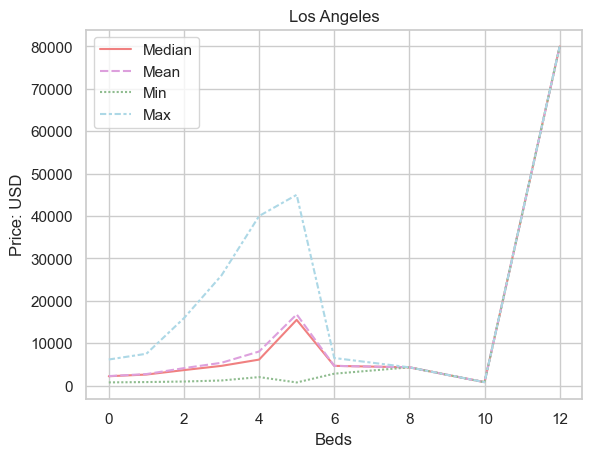

In [47]:
#create lineplot with LA data, set pallet and set x and y lables
lp =sb.lineplot(data= LADF[['Median','Mean','Min','Max']],palette=['lightcoral', 'plum', 'darkseagreen', 'lightblue'])
lp.set(xlabel='Beds', ylabel='Price: USD')
lp.set_title('Los Angeles')

Text(0.5, 1.0, 'San Francisco')

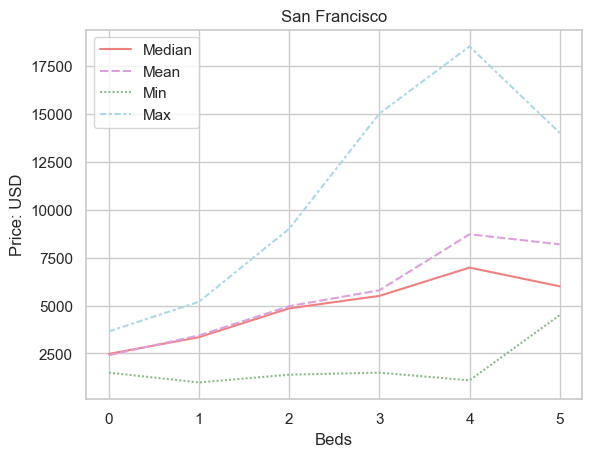

In [48]:
#create lineplot with SF data, set pallet and set x and y lables
lp = sb.lineplot(data= SFDF[['Median','Mean','Min','Max']],palette=['lightcoral', 'plum', 'darkseagreen', 'lightblue'])
lp.set(xlabel='Beds', ylabel='Price: USD')
lp.set_title('San Francisco')

Text(0.5, 1.0, 'San Diego')

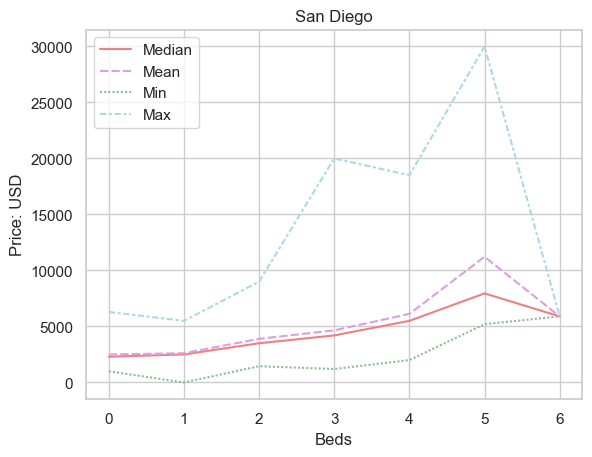

In [49]:
#create lineplot with SD data, set pallet and set x and y lables
lp= sb.lineplot(data= SDDF[['Median','Mean','Min','Max']],palette=['lightcoral', 'plum', 'darkseagreen', 'lightblue'])
lp.set(xlabel='Beds', ylabel='Price: USD')
lp.set_title('San Diego')

Text(0.5, 1.0, 'Sacramento')

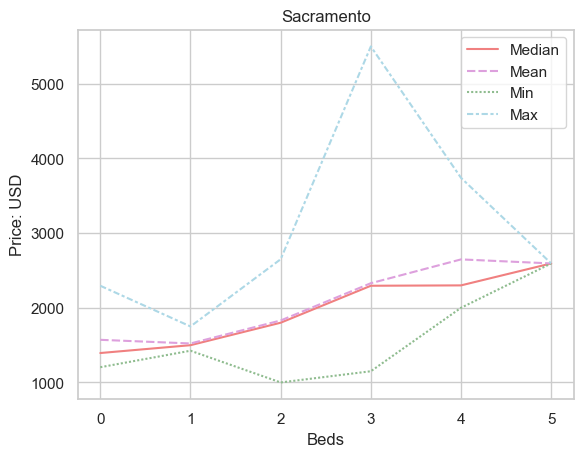

In [50]:
#create lineplot with Sacramento data, set pallet and set x and y lables
lp = sb.lineplot(data= SACDF[['Median','Mean','Min','Max']],palette=['lightcoral', 'plum', 'darkseagreen', 'lightblue'])
lp.set(xlabel='Beds', ylabel='Price: USD')
lp.set_title('Sacramento')

In [51]:
#create df of median rents by city 
median = {'Los Angeles':LADF['Median'],'San Francisco': SFDF['Median'],'San Diego': SDDF['Median'],'Sacramento':SACDF['Median']}
medianDF = pd.DataFrame.from_dict(median)
medianDF

,Los Angeles,San Francisco,San Diego,Sacramento
0,2200,2475,2300,1394
1,2600,3350,2500,1499
2,3650,4850,3500,1800
3,4650,5500,4200,2295
4,6125,6975,5500,2300
5,15500,6000,7950,2594
6,4650,NaN,5900,NaN
8,4300,NaN,NaN,NaN
10,800,NaN,NaN,NaN
12,80000,NaN,NaN,NaN


[Text(0.5, 0, 'Beds'), Text(0, 0.5, 'Median Price: USD')]

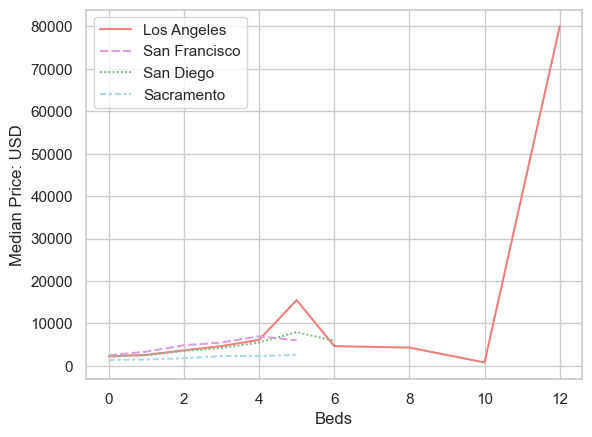

In [52]:
# create lineplot to show comparison of median rent by city
lp = sb.lineplot(data= medianDF[['Los Angeles', 'San Francisco', 'San Diego', 'Sacramento']], palette=['lightcoral', 'plum', 'darkseagreen', 'lightblue'])
lp.set(xlabel='Beds', ylabel='Median Price: USD')

In [53]:
# find the mean rent for the different bedrooms
medianDF.mean(axis = 1)

0     2092
1     2487
2     3450
3     4161
4     5225
5     8011
6     5275
8     4300
10     800
12   80000
dtype: float64